In [1]:
from graph import Graph
from dijkstra import dijkstra_list, dijkstra_matrix

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Graph creation

In [2]:
list_graph = Graph(9, "adjacency_list")
matrix_graph = Graph(9, "adjacency_matrix")

# Add edges to list_graph
list_graph.add_edge(0, 1, 4)
list_graph.add_edge(0, 7, 8)
list_graph.add_edge(1, 2, 8)
list_graph.add_edge(1, 7, 11)
list_graph.add_edge(2, 3, 7)
list_graph.add_edge(2, 5, 4)
list_graph.add_edge(2, 8, 2)
list_graph.add_edge(3, 4, 9)

# Add edges to matrix_graph
matrix_graph.add_edge(0, 1, 4)
matrix_graph.add_edge(0, 7, 8)
matrix_graph.add_edge(1, 2, 8)
matrix_graph.add_edge(1, 7, 11)
matrix_graph.add_edge(2, 3, 7)
matrix_graph.add_edge(2, 5, 4)
matrix_graph.add_edge(2, 8, 2)
matrix_graph.add_edge(3, 4, 9)

In [3]:
print(list_graph)
print(matrix_graph)

0: [(1, 4), (7, 8)]
1: [(0, 4), (2, 8), (7, 11)]
2: [(1, 8), (3, 7), (5, 4), (8, 2)]
3: [(2, 7), (4, 9)]
4: [(3, 9)]
5: [(2, 4)]
6: []
7: [(0, 8), (1, 11)]
8: [(2, 2)]
[0, 4, 0, 0, 0, 0, 0, 8, 0]
[4, 0, 8, 0, 0, 0, 0, 11, 0]
[0, 8, 0, 7, 0, 4, 0, 0, 2]
[0, 0, 7, 0, 9, 0, 0, 0, 0]
[0, 0, 0, 9, 0, 0, 0, 0, 0]
[0, 0, 4, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0]
[8, 11, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 2, 0, 0, 0, 0, 0, 0]


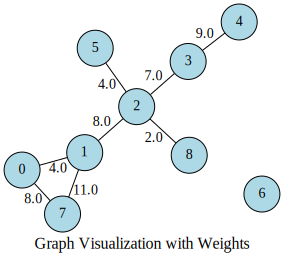

In [4]:
list_graph.visualize()

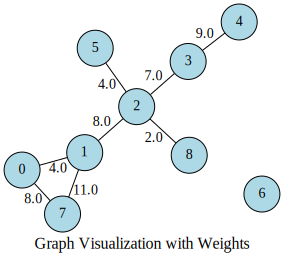

In [5]:
matrix_graph.visualize()

# Dijkstra test run

In [6]:
print(dijkstra_list(list_graph, 0))
print(dijkstra_matrix(matrix_graph, 0))

[0, 4, 12, 19, 28, 16, inf, 8, 14]
[0, 4, 12, 19, 28, 16, inf, 8, 14]
